In [11]:
import math
import random
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [12]:

# NA_list record each customer's arrival time
# ND_list record each customer's departure time
def arrival(n, lamda, mu, ta, td, NA, NA_list, total_service): #客人先到執行此BOX
  t = ta
  n = n + 1
  NA = NA + 1
  NA_list.append(ta)
  U = random.random()
  ta = ta + (-1 / lamda) * math.log(U)
  if n == 1:
    U2 = random.random()
    td = t + (-1 / mu) * math.log(U2)  #next customer's departure time
    total_service += (-1 / mu) * math.log(U2)
  return n, t, ta, td, NA, NA_list, total_service


def departure(n, mu, td, ND, ND_list, total_service):  #客人先離開執行此BOX
  t = td
  n = n -1
  ND = ND + 1
  ND_list.append(td)
  if n > 0:
    U = random.random()
    total_service += (-1 / mu) * math.log(U)
    td = t + (-1 / mu) * math.log(U)
  if n == 0:
    td = float("inf")
  return n, t, td, ND, ND_list, total_service


def MM1queue(lamda, mu, customer_number):  #輸出單次執行MM1時每位客人等待時間和整體utilization
  t, NA, ND, total_service, ta, td, utilization, n, end_time = 0, 0, 0, 0, 0, 0, 0, 0, 0
  waiting_time, NA_list, ND_list = [], [], []
  td = float("inf") #第一位顧客離開時間先初始化，之後才會在arrival()中準確設置離開時間
  U = random.random()
  ta = (-1 / lamda) * math.log(U)  #第一位顧客進來時間
  while NA != customer_number or ND != customer_number: #如果顧客人數到店次數=離店次數=設置的總顧客人數，則MM1結束，否則運行此迴圈
    if ta < td and NA != customer_number:  #下個時間點新顧客到店探訪優先於有顧客先離開了店
      n, t, ta, td, NA, NA_list, total_service = arrival(n, lamda, mu, ta, td, NA, NA_list, total_service)
    else: # td < ta    #下個時間點有顧客先離開了店優先於新顧客到店探訪
      end_time = td
      n, t, td, ND, ND_list, total_service = departure(n, mu, td, ND, ND_list, total_service)

  #結束運行，開始計算每位顧客等待時間和utilization
  if customer_number != 0:
    waiting_time = [0]
    for i in range(1, customer_number):
      waiting_time.append(max(ND_list[i-1] - NA_list[i],0))
    utilization = total_service / (end_time)
  else:
    waiting_time = [0]
    utilization = 0
  return waiting_time, utilization


def plot_MM1_ver1(lamda, mu, customer_number): #顯示平均等待時間和utiization 和 繪出1次MM1中每位顧客的等待時間
  waiting_time, utilization = MM1queue(lamda, mu, customer_number)
  average_waiting_time = sum(waiting_time) / customer_number
  print("utilization: ",utilization)
  print("average_waiting_time: ", average_waiting_time)

  plt.plot(waiting_time, label="Waiting Time", linewidth=2, color='black')

  plt.title('M/M/1 Queue System Simulation')
  plt.xlabel('Number of Customers')
  plt.ylabel("Each custimers' Waiting Time")
  #plt.legend()
  plt.show()


def cal_95CI(waiting_time): #計算信賴區間
  st_dev = statistics.pstdev(waiting_time) #算標準差
  average_waiting_time = statistics.mean(waiting_time) #算平均值
  CI_95 = (1.96 * st_dev) / math.sqrt(len(waiting_time)) #計算95%信賴區間
  return CI_95

def plot_MM1_ver2(MM1_simu_time, lamda_np, mu, customer_number): #繪出lamda與等待時間關係
  mean_waiting_time = []
  each_95CI_interval = []
  waitng_total = []
  for i in range(len(lamda_np)):
    for j in range(MM1_simu_time):
      waiting_time, utilization = MM1queue(lamda_np[i], mu, customer_number)
      waitng_total.append(statistics.mean(waiting_time))
      #print(statistics.mean(waiting_time))
    each_95CI_interval.append(cal_95CI(waitng_total))
    #print(statistics.mean(waitng_total))
    mean_waiting_time.append(statistics.mean(waitng_total))
    waitng_total = []
  mean_waiting_time_np = np.array(mean_waiting_time)
  each_95CI_interval_np = np.array(each_95CI_interval)

  plt.plot(lamda_np, mean_waiting_time, label="Mean Waiting Time", linewidth=2, color='black')
  plt.fill_between(lamda_np, (mean_waiting_time_np - each_95CI_interval_np), (mean_waiting_time_np + each_95CI_interval_np), color='gray', alpha=0.2)
  plt.title('M/M/1 Queue System Simulation(RUN: ' + str(MM1_simu_time) + ' times )')
  plt.xlabel('Lamda')
  plt.ylabel("Mean Waiting Time")


lamda:  10  mu:  30
utilization:  0.34258019201499057
average_waiting_time:  0.015834081324944634


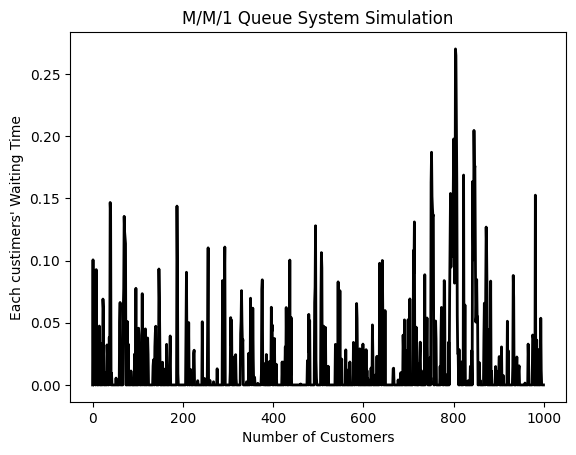

In [13]:
#問題1     CASE1: lamda < mu
lamda = 10  #arrival parameter
mu = 30  #service's parameter
customer_number = 1000  #customer's numbers
#waiting_time, utilization = MM1queue(lamda, mu, customer_number)
print("lamda: ",lamda, " mu: ",mu)
plot_MM1_ver1(lamda, mu, customer_number)


lamda:  30 mu:  10
utilization:  0.9996069474363
average_waiting_time:  32.77006922170742


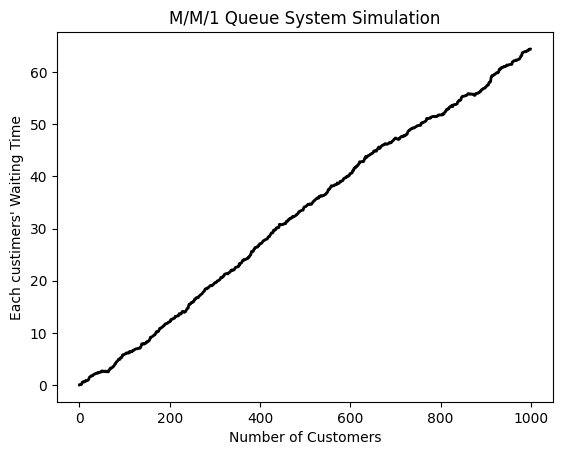

In [16]:
#問題1     CASE2: lamda > mu
lamda = 30  #arrival parameter
mu = 10  #service's parameter
customer_number = 1000  #customer's numbers
print("lamda: ",lamda, "mu: ",mu)
plot_MM1_ver1(lamda, mu, customer_number)

service parameter(mu):  0.5


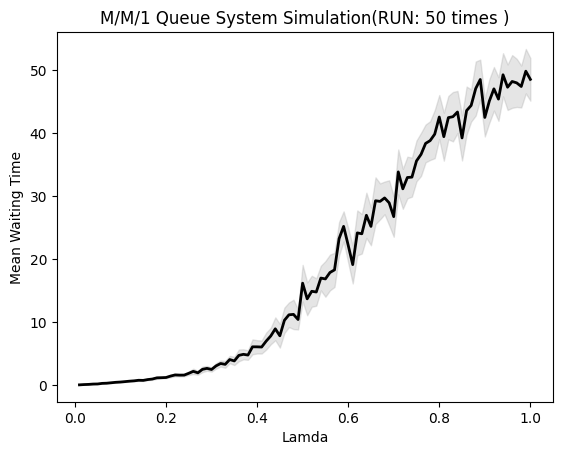

In [17]:
#問題2    CASE1: MM1_simu_time = 50
MM1_simu_time = 50
lamda_np = np.linspace(((1 - 0)/100) , 1, 100)
mu = 0.5  #service's parameter
customer_number = 100  #customer's numbers
plot_MM1_ver2(MM1_simu_time, lamda_np, mu, customer_number)

print("service parameter(mu): ", mu)

service parameter(mu):  0.5


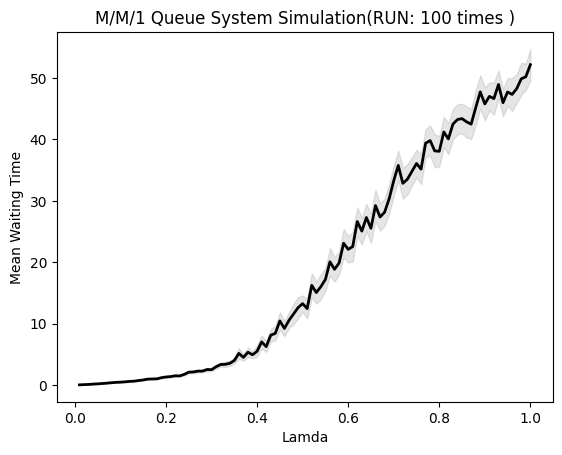

In [18]:
#問題2    CASE2: MM1_simu_time = 100
MM1_simu_time = 100
lamda_np = np.linspace(((1 - 0)/100) , 1, 100)
mu = 0.5  #service's parameter
customer_number = 100  #customer's numbers
plot_MM1_ver2(MM1_simu_time, lamda_np, mu, customer_number)

print("service parameter(mu): ", mu)

service parameter(mu):  0.5


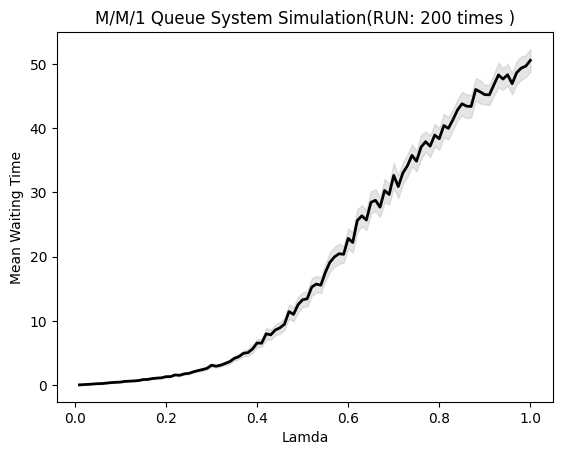

In [19]:
#問題2    CASE3: MM1_simu_time = 200
MM1_simu_time = 200
lamda_np = np.linspace(((1 - 0)/100) , 1, 100)
mu = 0.5  #service's parameter
customer_number = 100  #customer's numbers
plot_MM1_ver2(MM1_simu_time, lamda_np, mu, customer_number)

print("service parameter(mu): ", mu)

service parameter(mu):  0.2


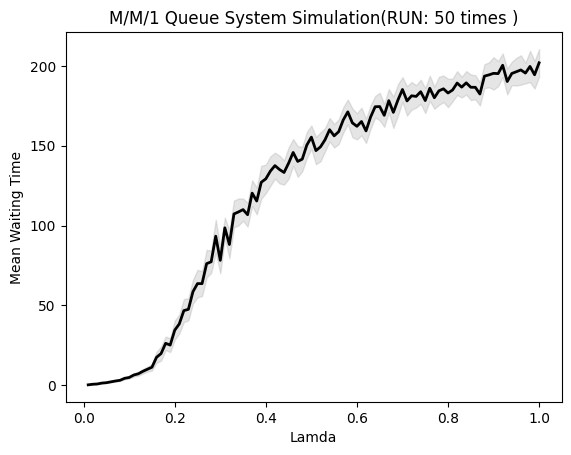

In [20]:
#問題2    CASE4: MM1_simu_time = 50 , mu = 0.2
MM1_simu_time = 50
lamda_np = np.linspace(((1 - 0)/100) , 1, 100)
mu = 0.2  #service's parameter
customer_number = 100  #customer's numbers
plot_MM1_ver2(MM1_simu_time, lamda_np, mu, customer_number)

print("service parameter(mu): ", mu)